In [ ]:
!unzip /content/my_dataset.zip -d /content/data
!pip install ultralytics

unzip:  cannot find or open /content/my_dataset.zip, /content/my_dataset.zip.zip or /content/my_dataset.zip.ZIP.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.1 MB/s eta 0:00:00


In [ ]:
!mkdir -p /content/data
!unzip -q "/content/My Son.v1-roboflow-instant-1--eval-.yolov8.zip" -d /content/data

In [ ]:
!ls -R /content/data

/content/data:
data.yaml  README.dataset.txt  README.roboflow.txt  train  valid

/content/data/train:
images	labels

/content/data/train/images:
IMG-20251118-WA0005_jpg.rf.c8e41af56ab20e28edd2d5b215a15789.jpg
IMG-20251118-WA0006_jpg.rf.316085d9acc7bb83e4157ce56b027035.jpg
IMG-20251118-WA0007_jpg.rf.0fb6b078a0d2e68430a776ae48e81901.jpg
IMG-20251118-WA0008_jpg.rf.0542b5061e1ebbae441aa33ef5d7b0dc.jpg
IMG-20251118-WA0009_jpg.rf.88f61c80cc5e4a5f7659c347b1123e4c.jpg
IMG-20251118-WA0010_jpg.rf.ac6e96336585d50e03406205bc26b950.jpg
IMG-20251118-WA0011_jpg.rf.a48640eb482977aa0e6a124292adc263.jpg
IMG-20251118-WA0012_jpg.rf.2beccd481d69b4b65d611ee8729f69e6.jpg
IMG-20251118-WA0014_jpg.rf.297d78e3d16966095b71c28541bceace.jpg
IMG-20251118-WA0016_jpg.rf.31087f5ce5939ab2ac3540e28a0ec324.jpg
IMG-20251118-WA0018_jpg.rf.763ed376beefda46b49b47f6bb689a60.jpg
IMG-20251118-WA0020_jpg.rf.72a8b90d6e3f6fbab4148f6c07b0de4a.jpg
IMG-20251118-WA0021_jpg.rf.10aae44a08174c9830f78d163fa22a55.jpg
IMG-20251118-WA0023_jpg

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="/content/data/data.yaml",
    epochs=50,
    imgsz=512
)

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b480e0794c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

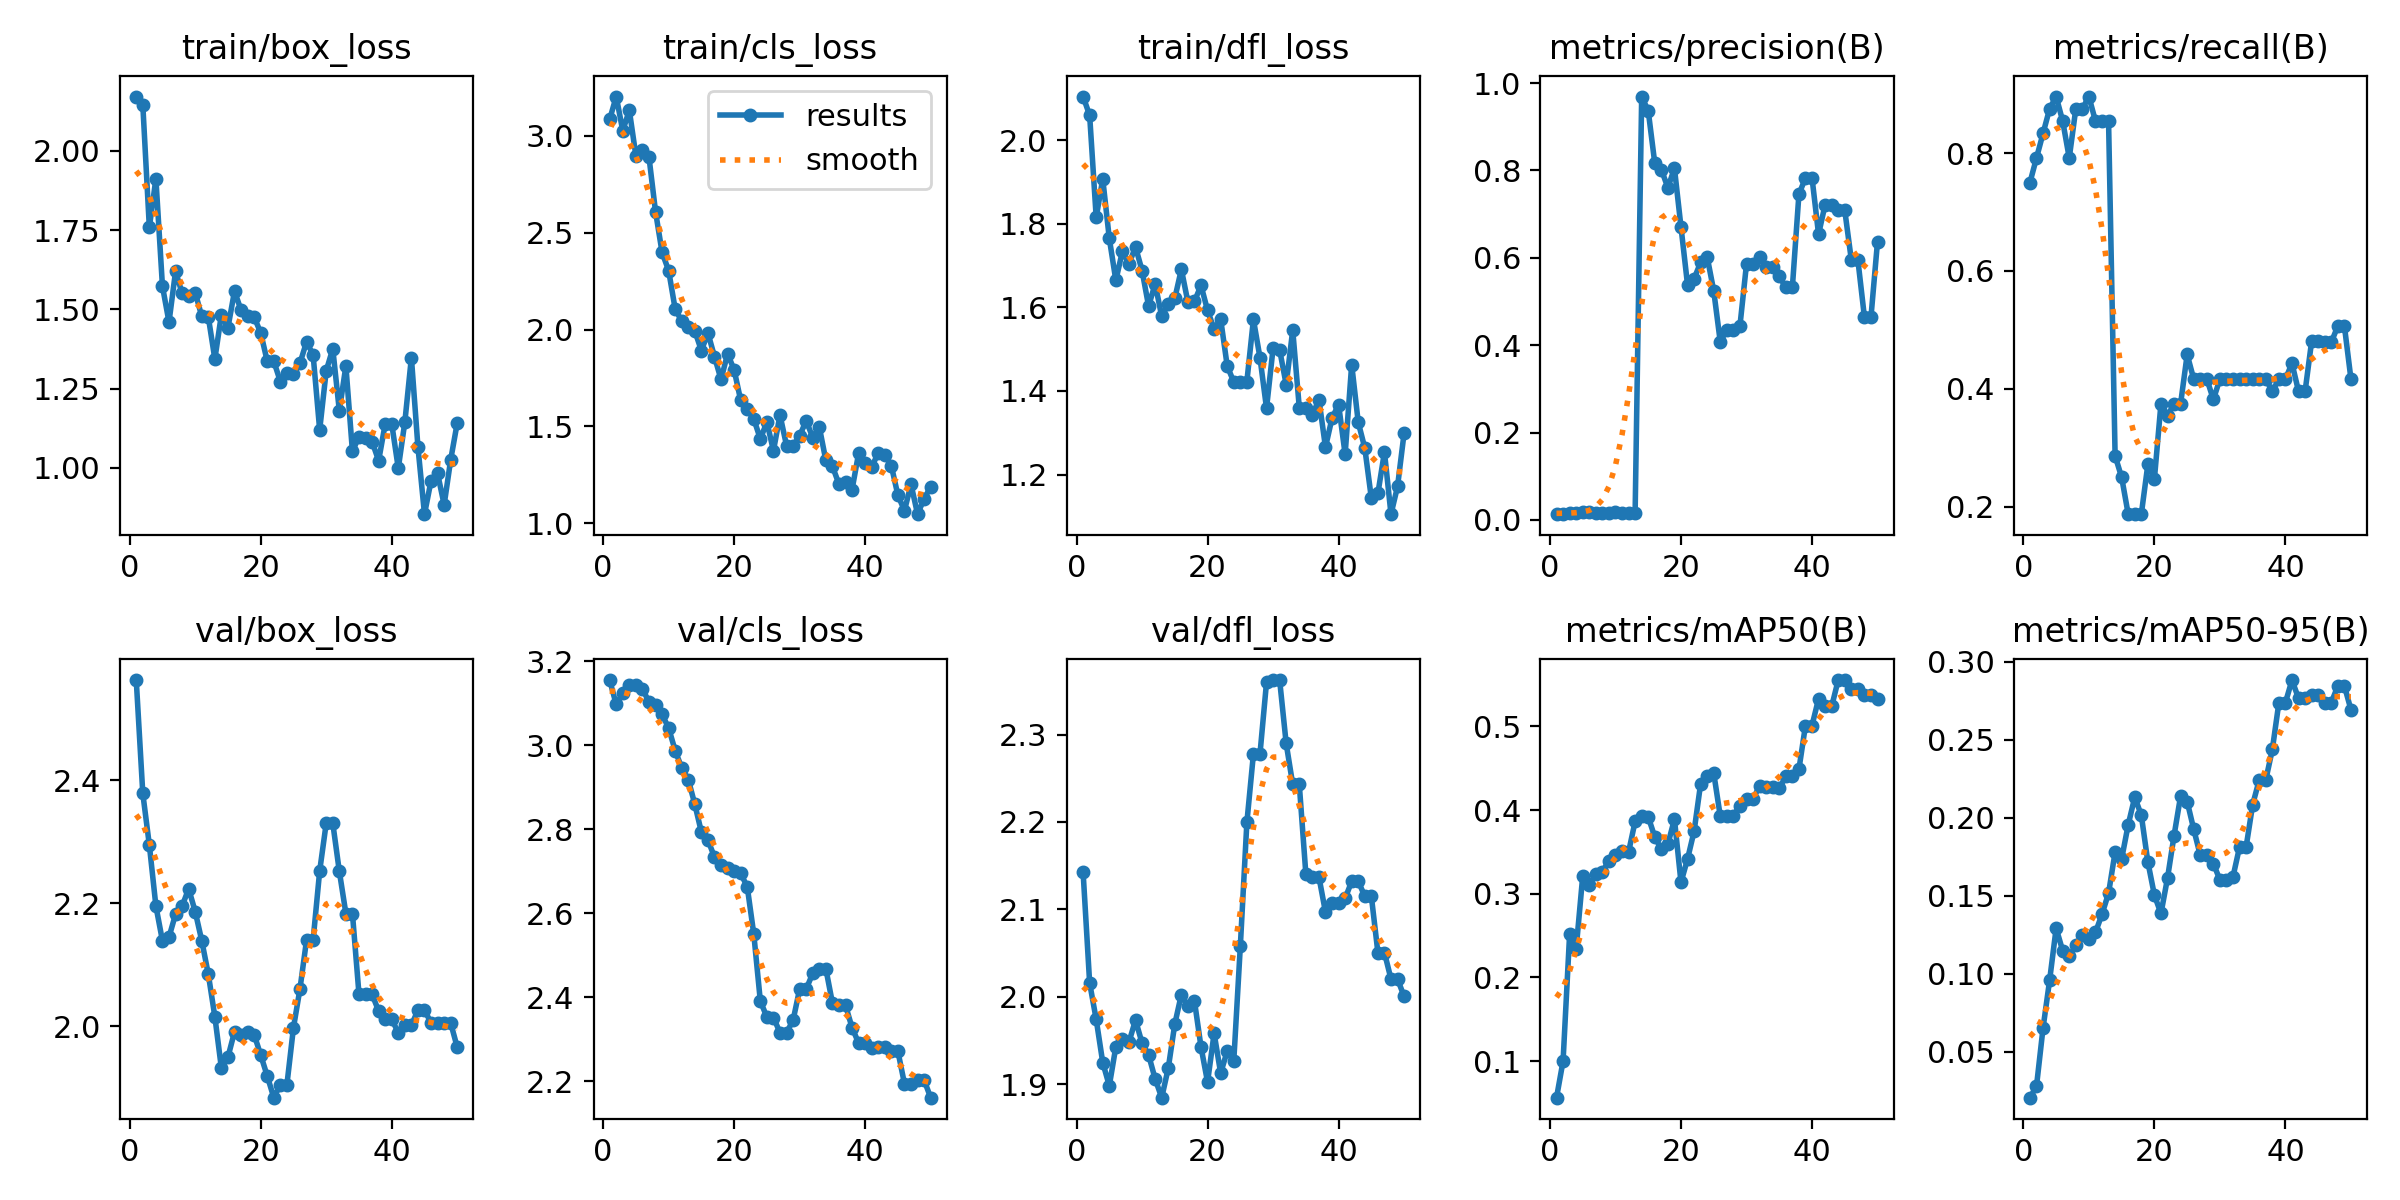

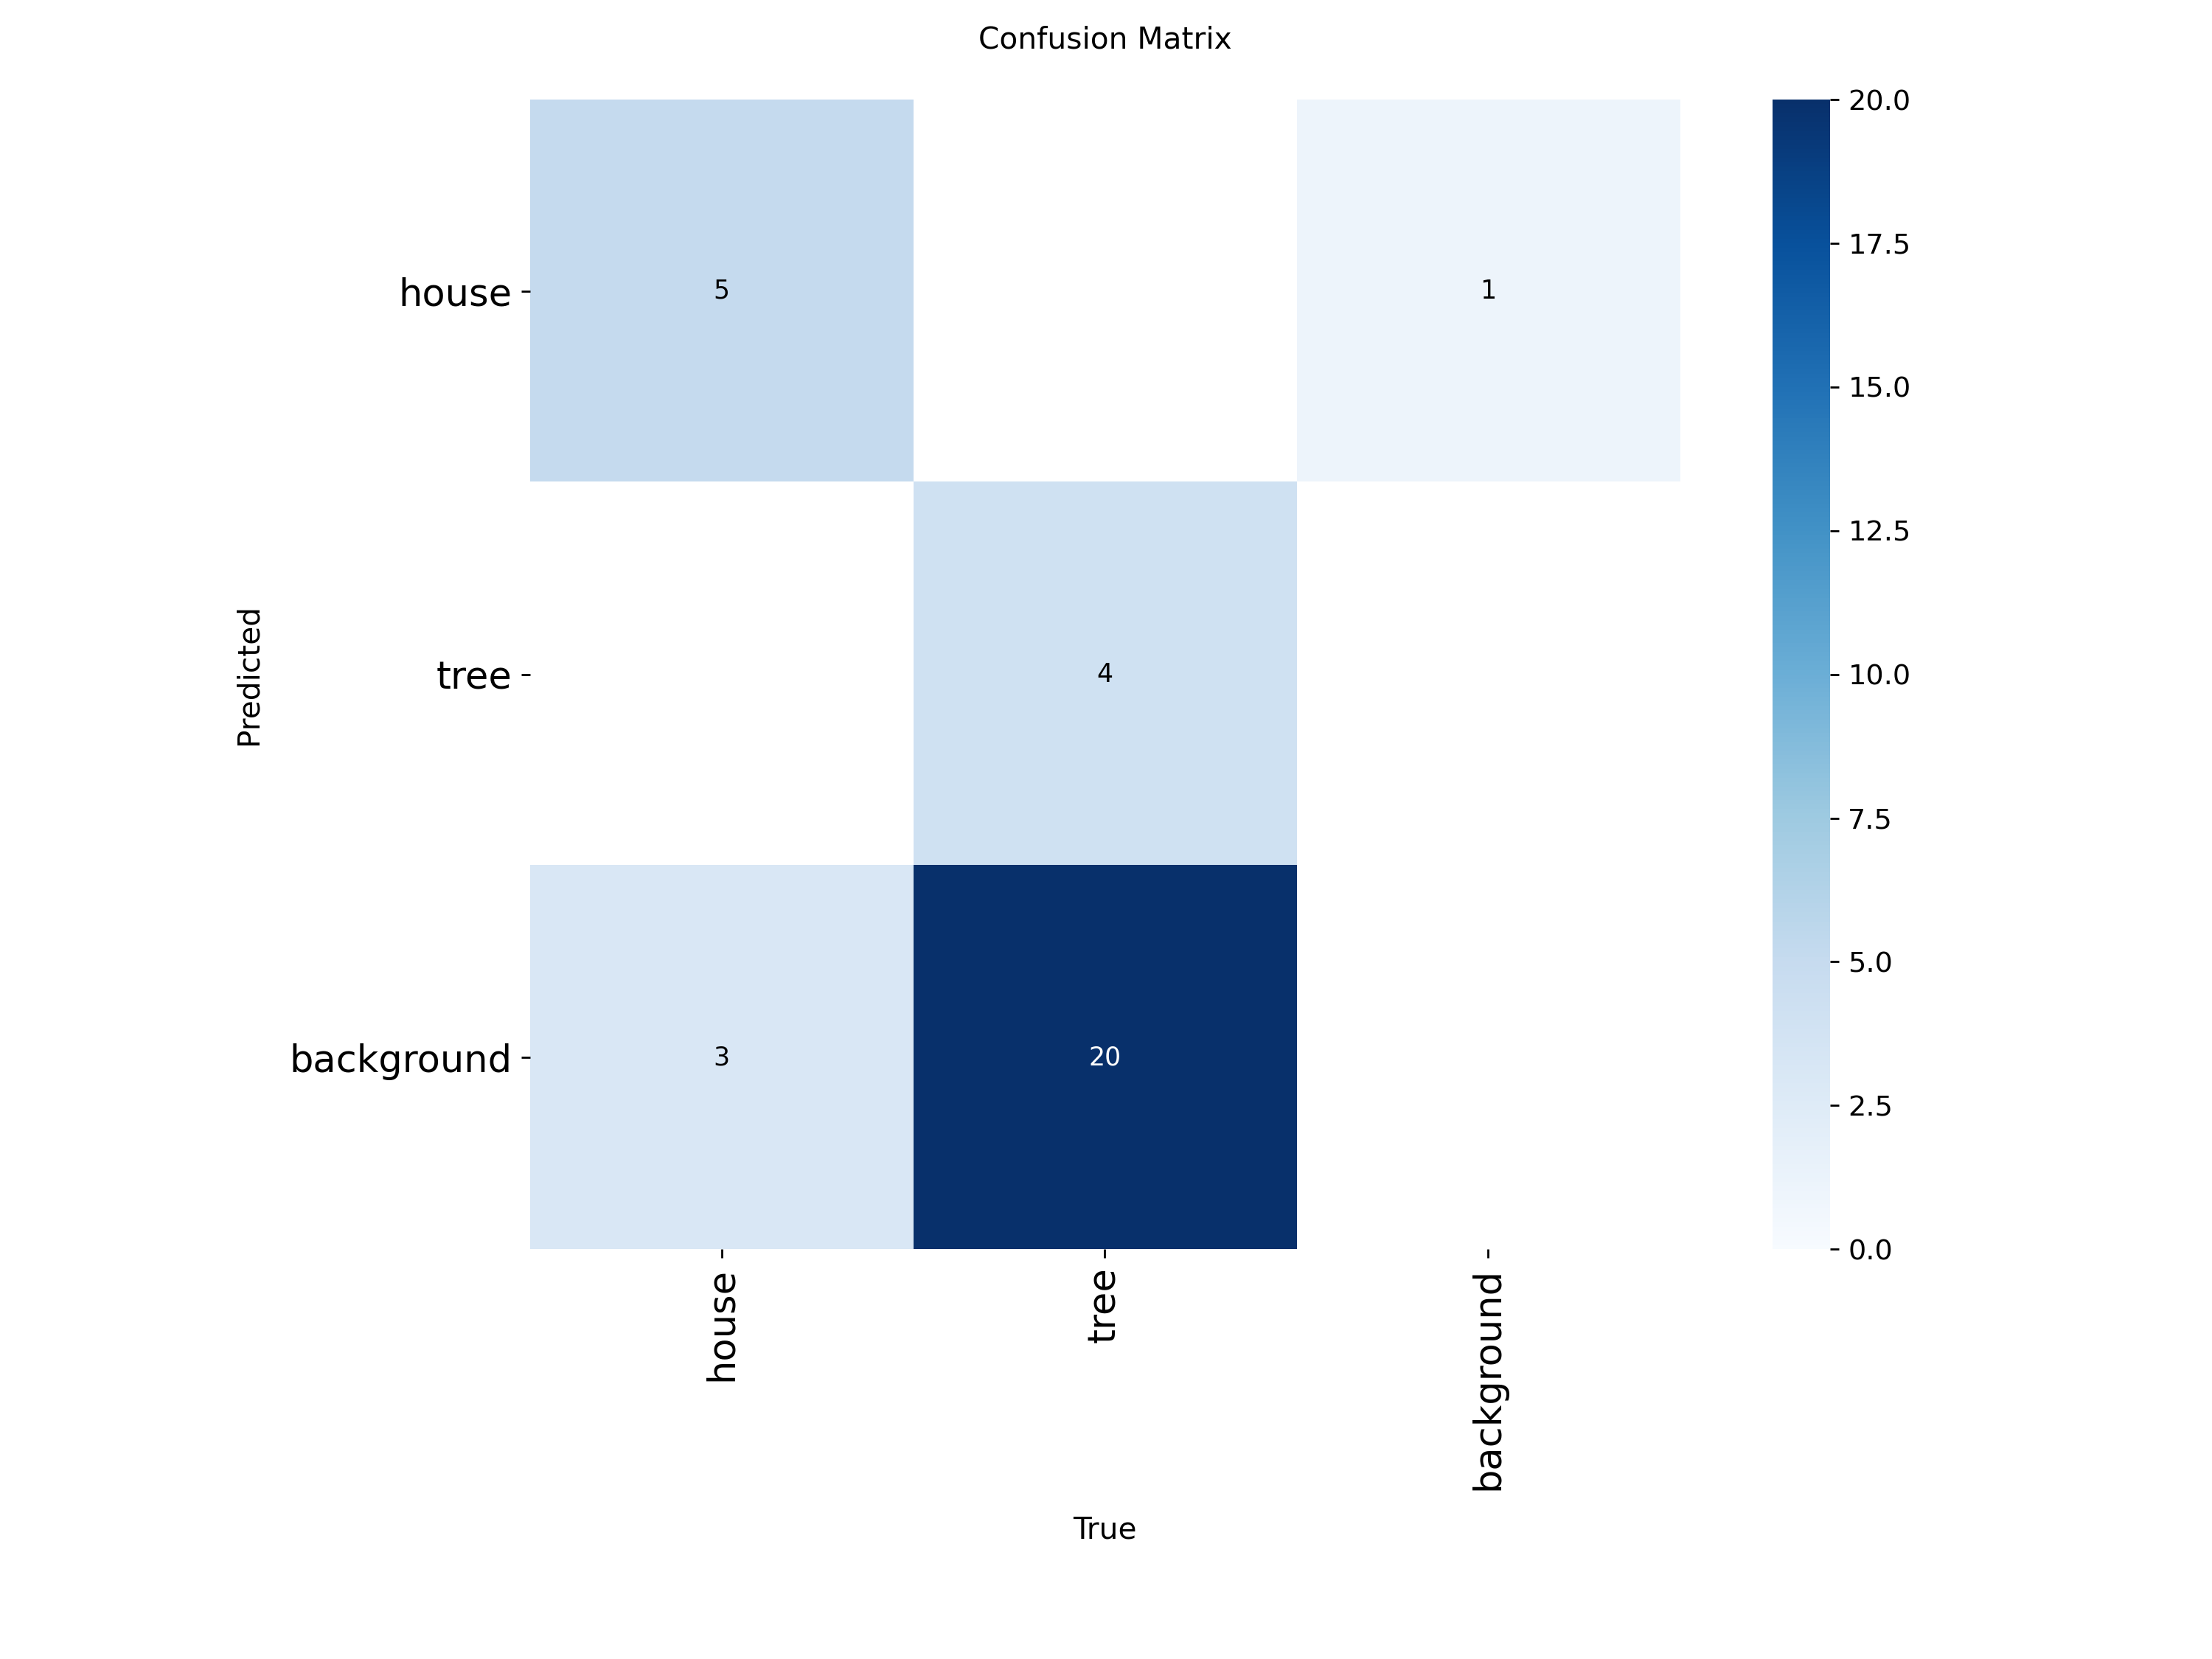

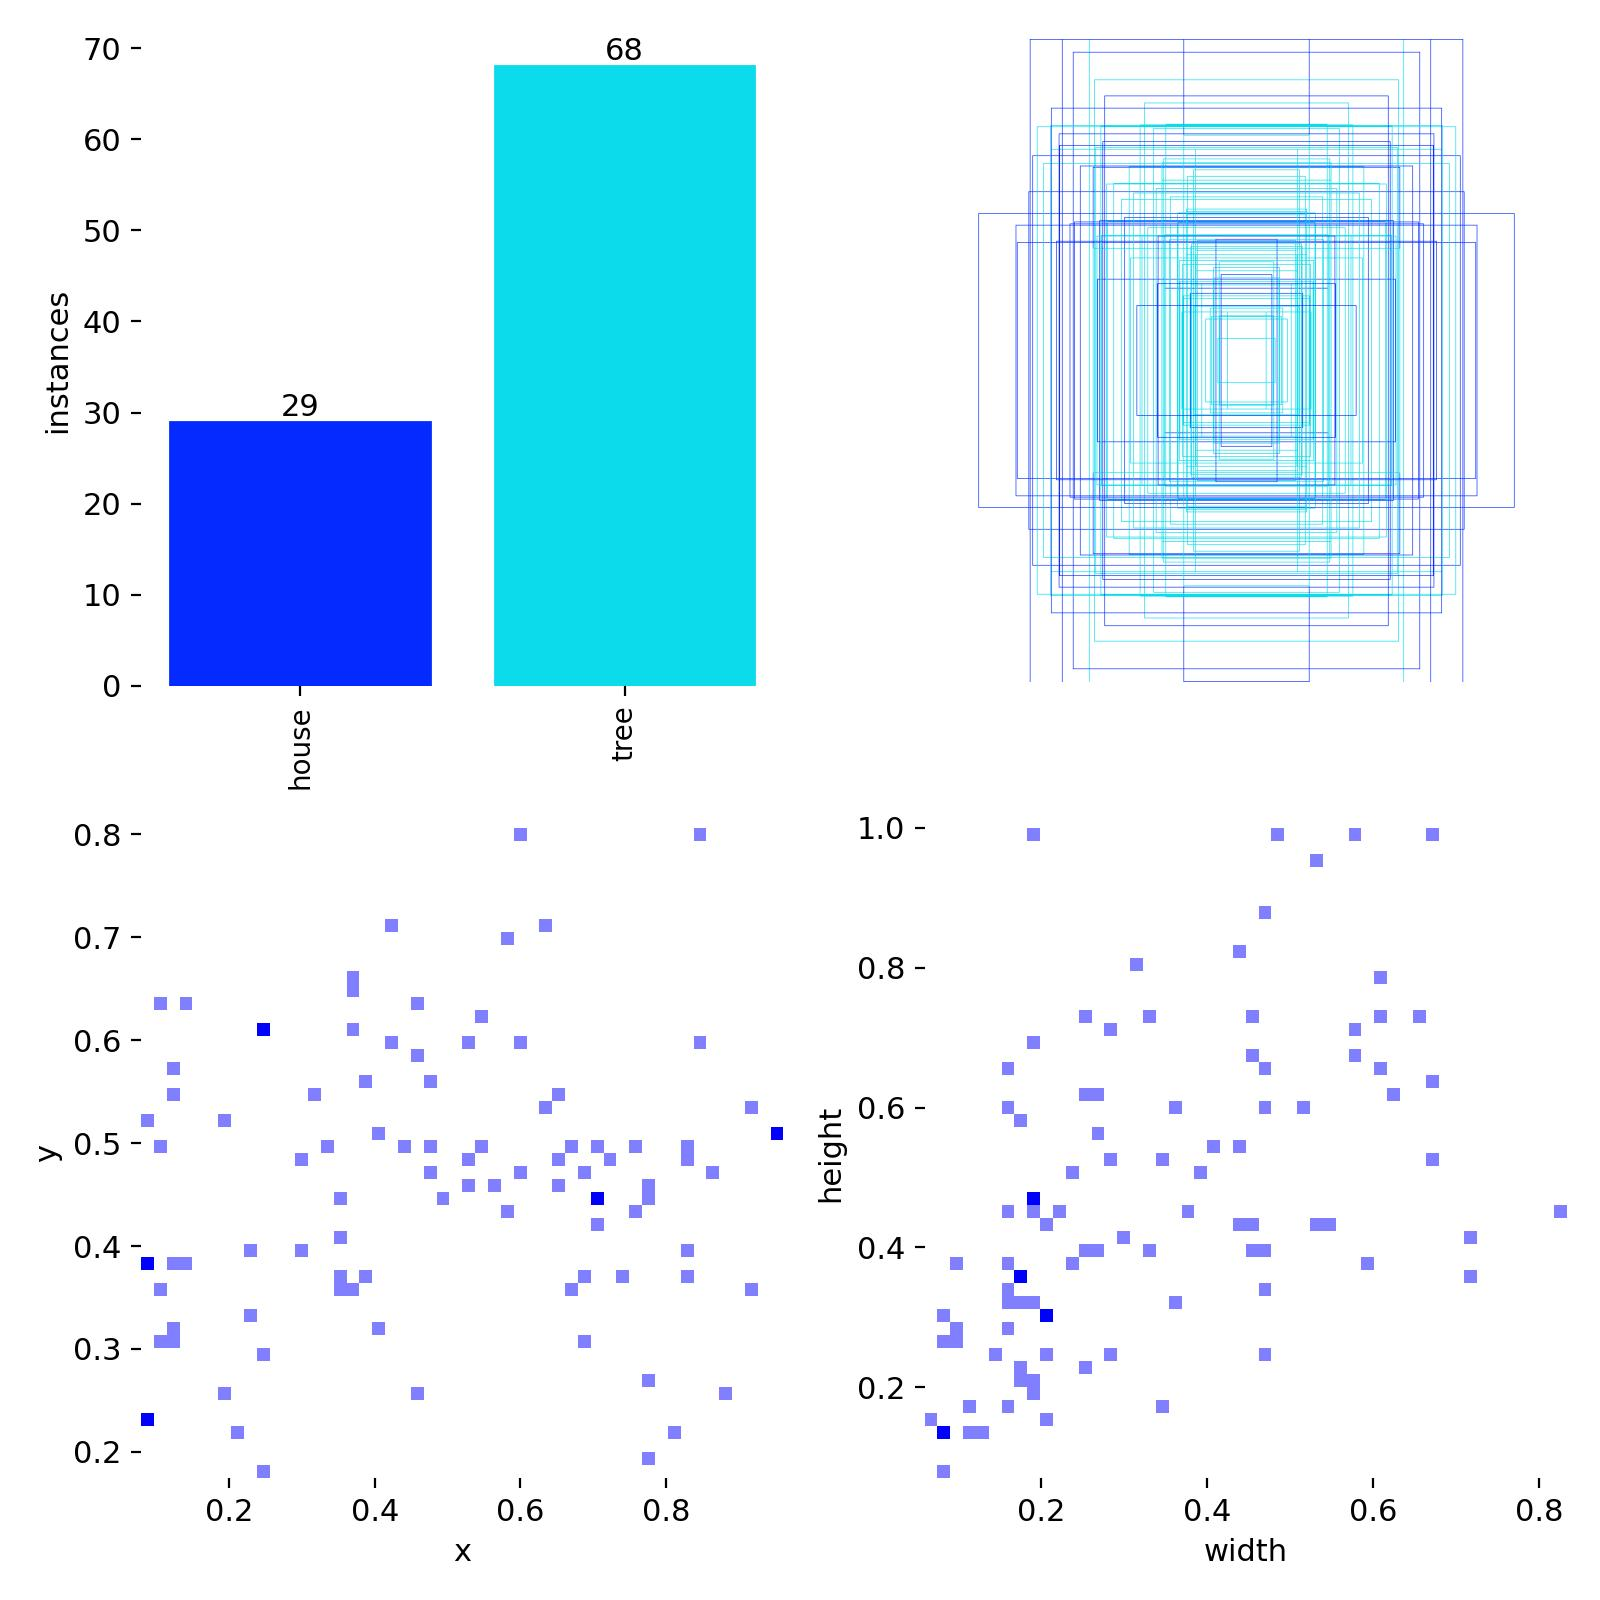

In [ ]:
from IPython.display import Image, display

display(Image('/content/runs/detect/train3/results.png'))          #лоссы и mAP
display(Image('/content/runs/detect/train3/confusion_matrix.png')) #матрица ошибок
display(Image('/content/runs/detect/train3/labels.jpg'))           #разметка

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train3/weights/best.pt')
metrics = model.val(data='/content/data/data.yaml')

print(metrics)

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1550.2±709.5 MB/s, size: 270.0 KB)
val: Scanning /content/data/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 5/5 3.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                   all          5         32      0.655      0.446      0.533      0.288
                 house          5          8      0.562      0.644      0.707      0.415
                  tree          5         24      0.748      0.248      0.359      0.162
Speed: 5.5ms preprocess, 167.3ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to /content/runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.

Модель YOLOv8 была обучена на датасете с двумя классами: house и tree.
По результатам валидации: precision = 0.66, recall = 0.45, mAP0.5 = 0.53, mAP0.5–0.95 = 0.29.
Класс house распознаётся лучше (mAP0.5 ≈ 0.71), чем tree (mAP0.5 ≈ 0.36).
Основная проблема – низкий recall для дерева, то есть модель пропускает часть объектов.

In [ ]:
model = YOLO('/content/runs/detect/train3/weights/best.pt')

In [ ]:
results = model.predict(
    source='/content/5251657436144274585.jpg',
    save=True,
    conf=0.25
)


image 1/1 /content/5251657436144274585.jpg: 384x512 4 houses, 159.3ms
Speed: 5.3ms preprocess, 159.3ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 512)
Results saved to /content/runs/detect/predict


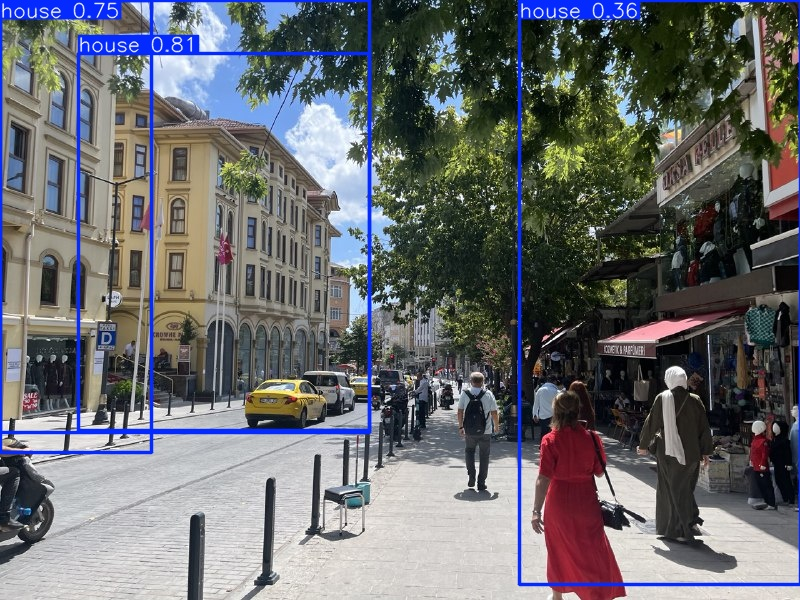

In [ ]:
from IPython.display import Image, display
import os

save_dir = '/content/runs/detect/predict'

for file in os.listdir(save_dir):
    if file.endswith('.jpg') or file.endswith('.png'):
        display(Image(filename=os.path.join(save_dir, file)))
        break

Для обучения я использовал небольшой датасет, который предварительно разметил в сервисе Roboflow. Данные включали изображения и соответствующие TXT-аннотации в формате YOLO.
Для обучения была использована предобученная модель yolov8n.pt, что позволило сократить время тренировки за счёт transfer learning.

Я настроил параметры обучения:

epochs = 50

imgsz = 512

batch = 8

conf = 0.25

оптимизация по умолчанию (AdamW/SGD)

Модель успешно прошла все эпохи, при этом в результате были получены метрики:

Box Loss убывал — значит модель постепенно улучшала локализацию объектов.

Classification Loss также уменьшался.

Recall и mAP50 росли, что говорит о повышении качества детекции.

mAP получился средним, что объясняется маленьким тренировочным датасетом.

Анализ результатов обучения

После обучения автоматически сформировались графики:

train/cls_loss

train/box_loss

precision / recall

mAP50-95

confusion matrix

Эти графики позволили понять, что модель лучше всего распознаёт класс house, однако хуже — tree. Это связано с тем, что в датасете изображений домов было значительно больше, чем деревьев, а также деревья представлены на сложном фоне.

Тестирование модели на новом изображении

Для проверки качества модели я загрузил новое изображение, которого не было ни в train, ни в valid.

Модель корректно определила несколько домов на изображении, отрисовала bounding boxes и вывела confidence-score.

Однако класс tree она определила хуже или пропустила — вероятно по причине:

небольшого количества примеров деревьев в датасете,

сложного окружения (тени, листья, слияние с фоном),

недостаточного количества эпох.

Тем не менее качество детекции домов оказалось хорошим — модель уверенно нашла все здания на изображении.

Основные выводы

В ходе работы я:

1)успешно подготовил и загрузил собственный датасет

2)корректно настроил файл data.yaml

3)обучил модель YOLOv8 на кастомных данных

4)проанализировал метрики качества

5)протестировал модель на новом изображении

6)получил визуальный результат с предсказаниями

Заключение

Данная лабораторная работа позволила мне пройти полный цикл разработки модели компьютерного зрения — от подготовки данных и разметки до обучения и тестирования. Я на практике увидел, как размер и разнообразие датасета влияют на качество модели, и почему важно обеспечивать баланс классов.

Несмотря на то, что модель плохо распознала деревья, итоговый результат можно считать успешным, поскольку: модель корректно обучена, пайплайн полностью рабочий, новая фотография обрабатывается и результаты сохраняются.

В дальнейшем качество можно улучшить увеличением количества данных, балансировкой классов, настройкой гиперпараметров или использованием более крупной модели YOLOv8 (s/m/l/x).

Работа дала мне хороший практический опыт по работе с современными нейросетями для детекции объектов.